In [107]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [108]:
from fastai.vision.all import *

In [109]:
set_seed(2)

In [110]:
path = Path("/home/kkalyan/tiny-imagenet-200/train/eye_train")

In [111]:
path.ls()

(#4) [Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/D'),Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/HE'),Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/models'),Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/.ipynb_checkpoints')]

In [112]:
path

Path('/home/kkalyan/tiny-imagenet-200/train/eye_train')

In [113]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.10,
                                   item_tfms=Resize(224),
                                   bs=64, num_workers=32)

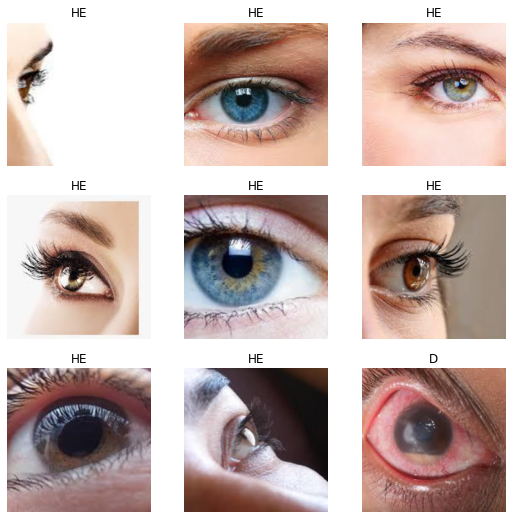

In [114]:
dls.show_batch()

In [115]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy]).to_fp16()
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.640701,3.639746,0.700000,0.300000,00:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.015527,2.869215,0.700000,0.300000,00:01


SuggestedLRs(lr_min=0.0013182567432522773, lr_steep=7.585775892948732e-05)

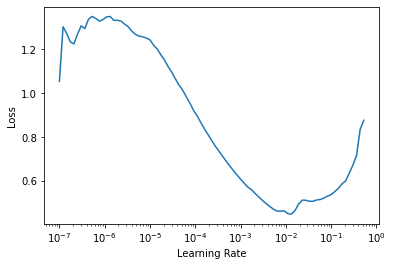

In [116]:
learn.lr_find()

In [117]:
learn.fit_one_cycle(10, lr_max=1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.582680,2.176122,0.800000,0.200000,00:01
1,1.343013,0.485999,0.200000,0.800000,00:01
2,1.003300,0.236962,0.100000,0.900000,00:01
3,0.816208,0.004077,0.000000,1.000000,00:01
4,0.686808,0.503431,0.300000,0.700000,00:01
5,0.587188,1.039178,0.300000,0.700000,00:01
6,0.504932,1.032971,0.200000,0.800000,00:01
7,0.443387,0.993496,0.200000,0.800000,00:01
8,0.390259,0.748661,0.200000,0.800000,00:01
9,0.348268,0.545715,0.200000,0.800000,00:01


In [118]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.001967,0.410102,0.200000,0.800000,00:01
1,0.002043,0.454900,0.200000,0.800000,00:01
2,0.001798,0.203305,0.100000,0.900000,00:01
3,0.002053,0.231608,0.100000,0.900000,00:01
4,0.002022,0.185206,0.100000,0.900000,00:01
5,0.001723,0.124835,0.100000,0.900000,00:01


In [119]:
interp = ClassificationInterpretation.from_learner(learn)

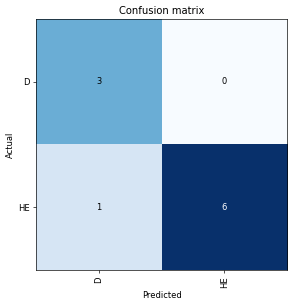

In [120]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [121]:
interp.top_losses

<bound method Interpretation.top_losses of <fastai.interpret.ClassificationInterpretation object at 0x7f3a495d1310>>

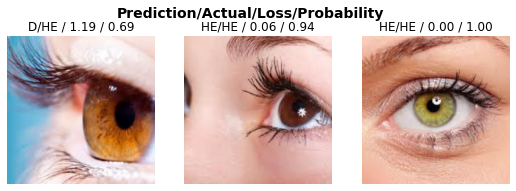

In [122]:
interp.plot_top_losses(3)

In [123]:
from ipywidgets import *
uploader = widgets.FileUpload()

In [97]:
uploader

FileUpload(value={}, description='Upload')

In [98]:
img = PILImage.create(uploader.data[0])

IndexError: list index out of range

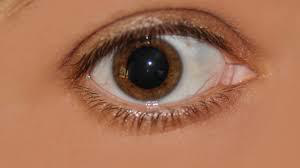

In [80]:
img

In [81]:
learn.predict(img)

('HE', tensor(1), tensor([4.3393e-04, 9.9957e-01]))